In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 主成分分析のが概要と特徴
主成分分析は次元の圧縮に関する手法である.多次元のデータを圧縮することでデータを要約し,特徴をみることができる.多次元データを2,3次元に圧縮することでグラフを作成することができ,可視化を行うこともできる.
例
- 5教科のテストの総合点は,`5`つの教科を総合点という1次元のデータに圧縮している.
- BMI指数は体重と身長という`2`つのデータをBMIという1次元のデータに圧縮している.

データの圧縮は,データの特徴(情報)をなるべく損失しないように行いたい.そこで,射影したデータの分散が最大になるような軸を探すことで,特徴の損失を小さくする.

## 分析の目的と概要
data6は体力テストのデータである.体力テストの結果(50m走,走り幅跳び,反復横跳び)から総合的な運動能力を示す指標の作成を目的に分析を行う.

In [3]:
df = pd.read_csv("data6.csv")
df

,No.,50m走,走り幅跳び,反復横跳び
0,1,8.3,315,35
1,2,7.9,393,39
2,3,10.1,240,33
3,4,9.3,305,37
4,5,8.6,330,45
5,6,8.8,340,31
6,7,8.1,383,43
7,8,8.7,334,38
8,9,8.2,397,41
9,10,8.2,380,40


## scikit-learnを用いた主成分分析

In [4]:
dft = df[["50m走","走り幅跳び","反復横跳び"]]

# 行列を標準化
dfs = dft.iloc[:, :].apply(lambda x: (x-x.mean())/x.std(), axis=0)

from sklearn.decomposition import PCA
pca =PCA() # インスタンス化
pca.fit(dfs)
feature = pca.transform(dfs) 

### 寄与率
1つの主成分がどれくらいの情報を説明しているかの割合を示す指標.

In [5]:
cr = pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])
cr

,0
PC1,0.783346
PC2,0.187670
PC3,0.028984


第一主成分が78%,第二主成分が19%の情報を説明していることが読み取れる.

### 累積寄与率
寄与率の累積を計算したもの.通常は第一主成分から数えて80%を超えるまでの主成分を引き続き分析に使用する.この基準を累積寄与率基準という.このような基準を設けるのは,データの情報を含まない主成分を残して分析を進めることを防止するためである.

In [6]:
cr.cumsum()

,0
PC1,0.783346
PC2,0.971016
PC3,1.000000


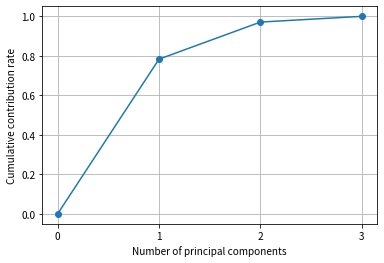

In [7]:
import matplotlib.ticker as ticker
plt.figure(facecolor="white")
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

第二主成分までで累積寄与率が97%になっていることから,第一主成分と第二主成分を分析に使用する.

### 固有値

In [8]:
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,2.350037
PC2,0.563011
PC3,0.086951


### 固有ベクトル
固有ベクトルは実際に求めた主成分が何を表しているかを解釈するために使用する.解釈には値の符号と絶対値の大きさを用いる.

In [9]:
pd.DataFrame(pca.components_, columns=dfs.columns[0:], index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,50m走,走り幅跳び,反復横跳び
PC1,0.613078,-0.616060,-0.494576
PC2,0.362143,-0.337232,0.868981
PC3,-0.702131,-0.711860,0.016352


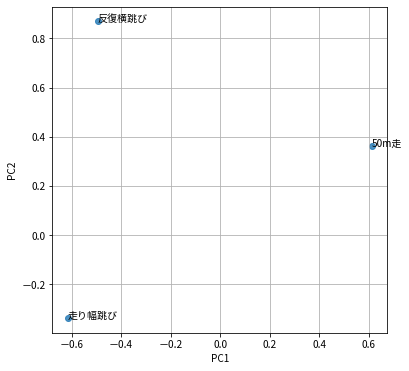

In [11]:
plt.figure(figsize=(6, 6),facecolor="white")
for x, y, name in zip(pca.components_[0], pca.components_[1], dft.columns[:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

第一主成分は,50m走のタイムが長いほど大きくなり,走り幅跳び,反復横跳びのスコアが小さいほど大きくなる.このことから第一主成分は総合的な運動能力のなさを表していると考えられる.総合的な運動能力のなさは符号を反転することで総合的な運動能力としてと捉えられるから分析目的を満たす主成分であると考えられる.
第二主成分は,反復横跳びの値が大きく,50m走と走り幅跳びの符号が逆になっていることから,反復横跳びの得意な人の値が大きくなるような主成分であると考えられる.

### 主成分得点

In [12]:
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,PC1,PC2,PC3
0,0.402608,-0.627689,0.716966
1,-1.405248,-0.589325,0.019652
2,3.243979,0.477907,-0.108374
3,1.229292,0.386997,-0.191501
4,-0.641147,1.423103,0.217247
5,1.003825,-1.322555,-0.193293
6,-1.546745,0.385289,-0.031946
7,0.193954,0.057179,0.026554
8,-1.404119,-0.054645,-0.349682
9,-1.076399,-0.136261,-0.105623


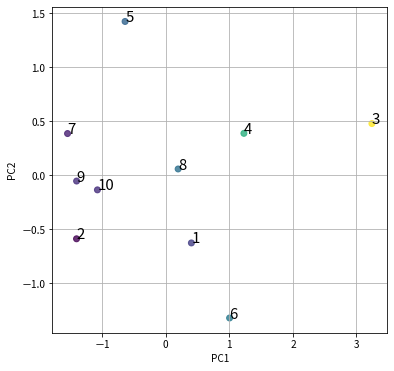

In [18]:
plt.figure(figsize=(6, 6),facecolor="white")
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(dfs.iloc[:, 0]))
for i in range(len(feature)):
    plt.text(feature[i, 0],feature[i, 1],str(i+1),fontsize=15)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

[[0.         0.61307824]
 [0.         0.36214268]]
[[ 0.         -0.6160599 ]
 [ 0.         -0.33723188]]
[[ 0.         -0.49457585]
 [ 0.          0.86898063]]


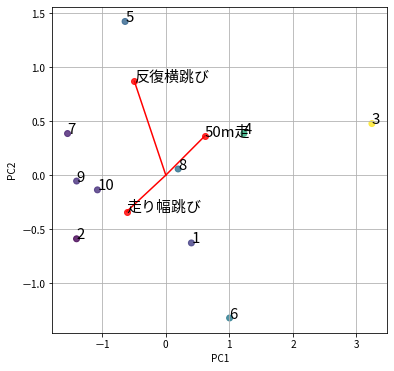

In [33]:
plt.figure(figsize=(6, 6),facecolor="white")
for x, y, name in zip(pca.components_[0], pca.components_[1], dft.columns[:]):
    plt.text(x, y, name,fontsize=15)
    vec = np.array([[0,x],[0,y]])
    print(vec)
    plt.plot(vec[0],vec[1],c="r")
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8,c="r")
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(dfs.iloc[:, 0]))
for i in range(len(feature)):
    plt.text(feature[i, 0],feature[i, 1],str(i+1),fontsize=15)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

主成分得点の散布図を見ることでデータの全体的な特徴をみることができる.例えば,No.3は全体的な運動能力が低い生徒であることがわかる.No.5は反復横跳びが得意な生徒であることがわかる.